## Katrina Hernandez: Midterm, Logistic Regression

In [97]:
import os
os.getcwd()

'C:\\Users\\katri\\Desktop\\Midterm'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading data

In [3]:
#read in churn data and replace blanks with NANs so that they may be identified and handled later on
churndata = pd.read_csv('churn.csv', na_values=' ')
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

This data set currently shows a lot of object data types so data cleaning is necessary.

## Cleaning and reformatting data

In [5]:
#convert gender to int
d = {'Male': 1, 'Female': 0}
# value of 1 in Male indicates male gender
churndata['Male'] = churndata['gender'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [6]:
#SeniorCitizen does not require conversion
churndata['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [7]:
#convert Partner to int
d = {'Yes': 1, 'No': 0}
# value of 1 indicates Partner = Yes
churndata['Partner'] = churndata['Partner'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,0,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [8]:
#convert Dependents to int
d = {'Yes': 1, 'No': 0}
# value of 1 indicates Dependents = Yes
churndata['Dependents'] = churndata['Dependents'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [9]:
#convert PhoneService to int
d = {'Yes': 1, 'No': 0}
# value of 1 indicates PhoneService = Yes
churndata['PhoneService'] = churndata['PhoneService'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [10]:
churndata['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [11]:
#convert MultipleLines to int
d = {'Yes': 1, 'No': 0, 'No phone service': 0}
# value of 1 indicates MultipleLines = Yes
churndata['MultipleLines'] = churndata['MultipleLines'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [12]:
churndata['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
#split InternetService into three variables: one for internet, one for DSL, and one for Fiber optic
d = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
#InternetService indictates DSL or Fiber optic service
churndata['Internet'] = churndata['InternetService'].map(d)

In [14]:
d = {'DSL': 1, 'Fiber optic': 0, 'No': 0}
churndata['DSL'] = churndata['InternetService'].map(d)

In [15]:
d = {'DSL': 0, 'Fiber optic': 1, 'No': 0}
churndata['FiberOptic'] = churndata['InternetService'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Internet,DSL,FiberOptic
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,1,1,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,1,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0,1


In [16]:
churndata['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
#convert OnlineSecurity to int
d = {'Yes': 1, 'No': 0, 'No internet service': 0}
# value of 1 indicates OnlineSecurity = Yes
churndata['OnlineSecurity'] = churndata['OnlineSecurity'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Internet,DSL,FiberOptic
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,No,Mailed check,56.95,1889.50,No,1,1,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,1,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0,1


In [18]:
churndata['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [19]:
#convert OnlineBackup to int
d = {'Yes': 1, 'No': 0, 'No internet service': 0}
# value of 1 indicates OnlineBackup = Yes
churndata['OnlineBackup'] = churndata['OnlineBackup'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Internet,DSL,FiberOptic
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,No,Mailed check,56.95,1889.50,No,1,1,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,1,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0,1


In [20]:
churndata['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
#convert DeviceProtection to int
d= {'Yes': 1, 'No': 0, 'No internet service': 0}
# value of 1 indicates DeviceProtection = Yes
churndata['DeviceProtection'] = churndata['DeviceProtection'].map(d)
churndata['DeviceProtection'].head()

0    0
1    1
2    0
3    1
4    0
Name: DeviceProtection, dtype: int64

In [22]:
churndata['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
#convert TechSupport to int
d= {'Yes': 1, 'No': 0, 'No internet service': 0}
# value of 1 indicates TechSupport = Yes
churndata['TechSupport'] = churndata['TechSupport'].map(d)
churndata['TechSupport'].head()

0    0
1    0
2    0
3    1
4    0
Name: TechSupport, dtype: int64

In [24]:
churndata['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
#convert StreamingTV to int
d= {'Yes': 1, 'No': 0, 'No internet service': 0}
# value of 1 indicates StreamingTV = Yes
churndata['StreamingTV'] = churndata['StreamingTV'].map(d)
churndata['StreamingTV'].head()

0    0
1    0
2    0
3    0
4    0
Name: StreamingTV, dtype: int64

In [26]:
churndata['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
#convert StreamingMovies to int
d= {'Yes': 1, 'No': 0, 'No internet service': 0}
# value of 1 indicates StreamingMovies = Yes
churndata['StreamingMovies'] = churndata['StreamingMovies'].map(d)
churndata['StreamingMovies'].head()

0    0
1    0
2    0
3    0
4    0
Name: StreamingMovies, dtype: int64

In [28]:
churndata['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
#split Contract into two variables: one for m2m and one for two year
d = {'Month-to-month': 1, 'One year': 0, 'Two year': 0}
churndata['m2mContract'] = churndata['Contract'].map(d)
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Internet,DSL,FiberOptic,m2mContract
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Yes,Electronic check,29.85,29.85,No,0,1,1,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,No,Mailed check,56.95,1889.50,No,1,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Yes,Mailed check,53.85,108.15,Yes,1,1,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,No,Bank transfer (automatic),42.30,1840.75,No,1,1,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Yes,Electronic check,70.70,151.65,Yes,0,1,0,1,1


In [30]:
d = {'Month-to-month': 0, 'One year': 0, 'Two year': 1}
churndata['twoyrContract'] = churndata['Contract'].map(d)

Note: Electing not to create a dummy variable for one year in order to avoid multiple collinearity

In [31]:
churndata['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
#converting PaperlessBilling to int
d = {'Yes': 1, 'No': 0}
churndata['PaperlessBilling'] = churndata['PaperlessBilling'].map(d)

In [33]:
churndata['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [34]:
##creating variables from PaymentMethod

#on auto-pay
d = {'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1}
churndata['AutoPay'] = churndata['PaymentMethod'].map(d)

In [35]:
#paying with bank transfer-- harder to cancel than credit
d = {'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0}
churndata['BankTransferPay'] = churndata['PaymentMethod'].map(d)

In [36]:
#convert Churn to integer
d = {'Yes': 1, 'No': 0}
churndata['Churn'] = churndata['Churn'].map(d)

In [37]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
Male                7043 non-null int64
Inte

## Addressing missing data

Total Charges are missing for 11 records. Need to determine why there could be monthly charges, but no  Total Charges.

In [38]:
churndata[churndata['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Male,Internet,DSL,FiberOptic,m2mContract,twoyrContract,AutoPay,BankTransferPay
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,...,NaN,0,0,1,1,0,0,1,1,1
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,...,NaN,0,1,0,0,0,0,1,0,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,...,NaN,0,0,1,1,0,0,1,0,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,...,NaN,0,1,0,0,0,0,1,0,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,...,NaN,0,0,1,1,0,0,1,1,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,...,NaN,0,1,0,0,0,0,1,0,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,...,NaN,0,1,0,0,0,0,1,0,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,...,NaN,0,0,0,0,0,0,1,0,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,...,NaN,0,1,0,0,0,0,0,0,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,...,NaN,0,0,1,1,0,0,1,0,0


Looking at the examples above, it appears that TotalCharges are blank for these 11 record because they represent brand new customers that have yet to be billed. I've converted the blanks to NAs for now. I could consider dropping these rows all together because the focus of churn analysis is to predict churn on existing customers, but since new customers aren't likely to be dropped from future data sets, it is best to leave these new customers so that it is training and testing are as inclusive as possible.

In [39]:
#convert TotalCharges from object to float
pd.to_numeric(churndata['TotalCharges'])
#verifying that conversion worked
type(churndata['TotalCharges'][0])

numpy.float64

Text(0.5,1,'Heatmap of Null Values in Churn dataset')

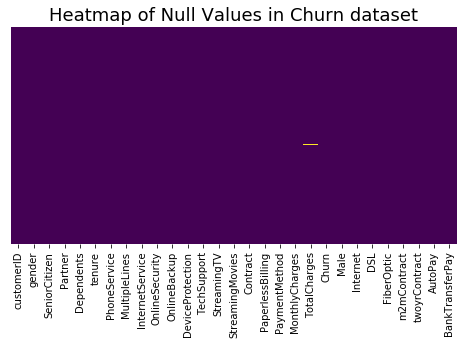

In [40]:
#checking null values- expecting to see some in TotalCharges
plt.figure(figsize=(8,4))
ax1 = sns.heatmap(churndata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax1.set_title("Heatmap of Null Values in Churn dataset", fontsize=18)

In [41]:
#replacing NAs with zeros since these customers have been charged $0 to date since they are new customers
churndata['TotalCharges'].fillna(0,inplace=True)
churndata[churndata['TotalCharges']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Male,Internet,DSL,FiberOptic,m2mContract,twoyrContract,AutoPay,BankTransferPay
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,...,0.0,0,0,1,1,0,0,1,1,1
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,...,0.0,0,1,0,0,0,0,1,0,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,...,0.0,0,0,1,1,0,0,1,0,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,...,0.0,0,1,0,0,0,0,1,0,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,...,0.0,0,0,1,1,0,0,1,1,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,...,0.0,0,1,0,0,0,0,1,0,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,...,0.0,0,1,0,0,0,0,1,0,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,...,0.0,0,0,0,0,0,0,1,0,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,...,0.0,0,1,0,0,0,0,0,0,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,...,0.0,0,0,1,1,0,0,1,0,0


Text(0.5,1,'Heatmap of Null Values in Churn dataset')

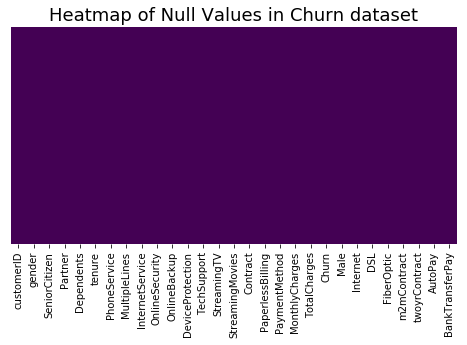

In [42]:
#verifying that NAs are dropped
plt.figure(figsize=(8,4))
ax1 = sns.heatmap(churndata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax1.set_title("Heatmap of Null Values in Churn dataset", fontsize=18)

No additional missing values to address!

In [43]:
churnClean = churndata[['tenure', 'Male', 'SeniorCitizen', 'Partner', 'Dependents', 'm2mContract', 'twoyrContract', 'PaperlessBilling', 'AutoPay', 'BankTransferPay', 'TotalCharges', 'MonthlyCharges', 'PhoneService', 'MultipleLines', 'Internet', 'FiberOptic', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']]
churnClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
tenure              7043 non-null int64
Male                7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
m2mContract         7043 non-null int64
twoyrContract       7043 non-null int64
PaperlessBilling    7043 non-null int64
AutoPay             7043 non-null int64
BankTransferPay     7043 non-null int64
TotalCharges        7043 non-null float64
MonthlyCharges      7043 non-null float64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
Internet            7043 non-null int64
FiberOptic          7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Churn    

## Adding new datapoints

In [44]:
churnClean['InternetServices'] = churnClean['OnlineSecurity'] + churnClean['OnlineBackup'] + churnClean['DeviceProtection'] + churnClean['TechSupport'] + churnClean['StreamingTV'] + churnClean['StreamingMovies']
churnClean[['InternetServices', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].head()

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InternetServices,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,0,0,0,0
1,2,1,0,1,0,0,0
2,2,1,1,0,0,0,0
3,3,1,0,1,1,0,0
4,0,0,0,0,0,0,0


## Visualizing the data

Text(0.5,1,'Population of Churn in Customers')

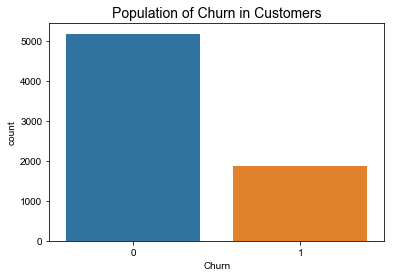

In [45]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1 = plt.subplot(111)
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=churnClean)
ax1.set_title('Population of Churn in Customers', fontsize=14)

#### Churn by binary demographic factors

Text(0.5,1,'Churn by Customers with Dependents')

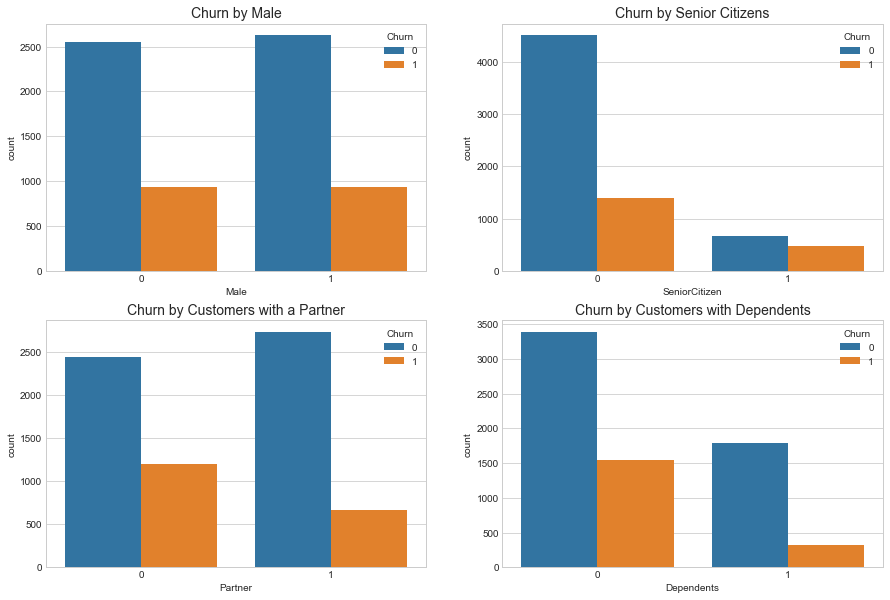

In [46]:
plt.figure(figsize=(15,10))

plt1 = plt.subplot(2,2,1)
sns.countplot(x='Male',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Male", fontsize=14)

plt1 = plt.subplot(2,2,2)
sns.countplot(x='SeniorCitizen',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Senior Citizens", fontsize=14)

plt1 = plt.subplot(2,2,3)
sns.countplot(x='Partner',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Customers with a Partner", fontsize=14)

plt1 = plt.subplot(2,2,4)
sns.countplot(x='Dependents',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Customers with Dependents", fontsize=14)

Rate of churn is high with Senior Citizens and lower with Partners and Dependents. Churn rates are relatively the same for both genders.

#### Churn by years of as a customer

Text(0.5,1,'Churn by Distribution of Tenure in Customers')

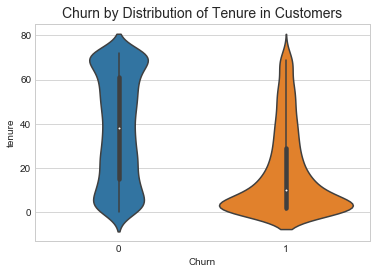

In [47]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1 = plt.subplot(111)
sns.violinplot(x="Churn", y="tenure", data=churnClean)
ax1.set_title("Churn by Distribution of Tenure in Customers", fontsize=14)

Churn rates are much higher with newer customers.

#### Churn by binary contract and payment factors

Text(0.5,1,'Churn by Bank Transfer Payment Method')

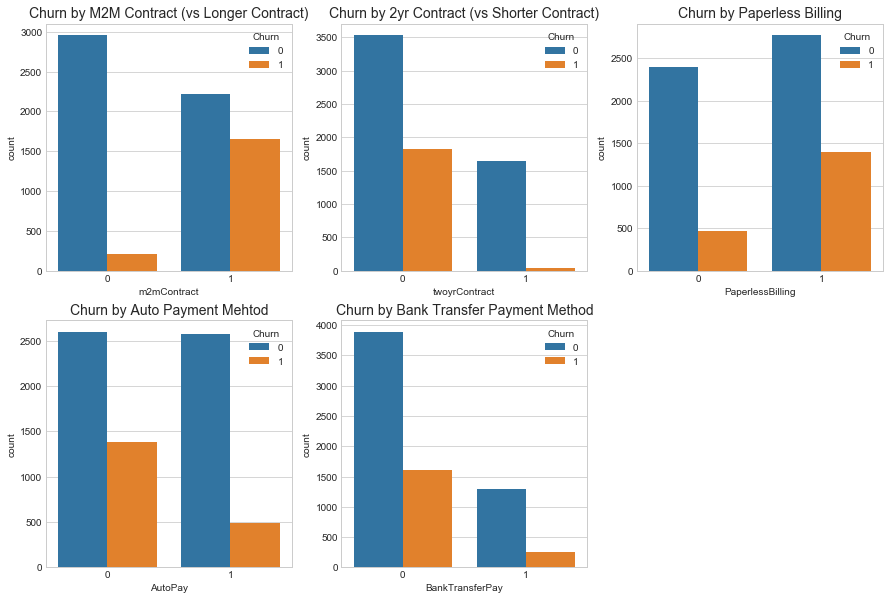

In [48]:
plt.figure(figsize=(15,10))

plt1 = plt.subplot(2,3,1)
sns.countplot(x='m2mContract',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by M2M Contract (vs Longer Contract)", fontsize=14)

plt1 = plt.subplot(2,3,2)
sns.countplot(x='twoyrContract',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by 2yr Contract (vs Shorter Contract)", fontsize=14)

plt1 = plt.subplot(2,3,3)
sns.countplot(x='PaperlessBilling',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Paperless Billing", fontsize=14)

plt1 = plt.subplot(2,3,4)
sns.countplot(x='AutoPay',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Auto Payment Mehtod", fontsize=14)

plt1 = plt.subplot(2,3,5)
sns.countplot(x='BankTransferPay',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Bank Transfer Payment Method", fontsize=14)

Payment and contract types appears to have a strong correlation with churn rate. Customers on Month-to-month contracts churn at very high rates while customers on 2year contracts hardly churn at all. Customers with paperless billing appear to churn more than those not on paperless billing. On the contrary, those with AutoPay and BankTransferPay churn at lower rates.

Text(0.5,1,'Distribution of Monthly Charges')

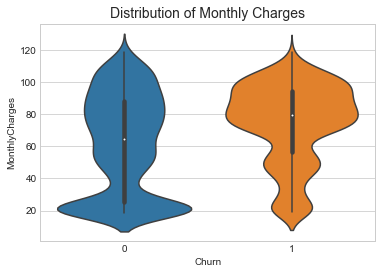

In [49]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1 = plt.subplot(111)
sns.violinplot(x="Churn", y="MonthlyCharges", data=churnClean)
ax1.set_title("Distribution of Monthly Charges", fontsize=14)

This is a bit messy, but looks like there could be some trend with higher paying customer churning- could be beneficial to come up with a binary field that looks at if a customer is paying $75+ per month for example.

Text(0.5,1,'Distribution of Total Charges')

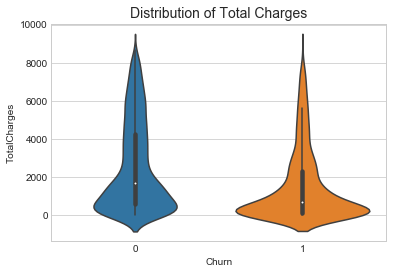

In [50]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1 = plt.subplot(111)
sns.violinplot(x="Churn", y="TotalCharges", data=churnClean)
ax1.set_title("Distribution of Total Charges", fontsize=14)

Total charges seems very murky here and is at risk of multicollinearity with MonthlyCharges and tenure. Will likely omit this from the model.

#### Churn by binary Phone Service factors

Text(0.5,1,'Churn by Customers with Multiple Lines')

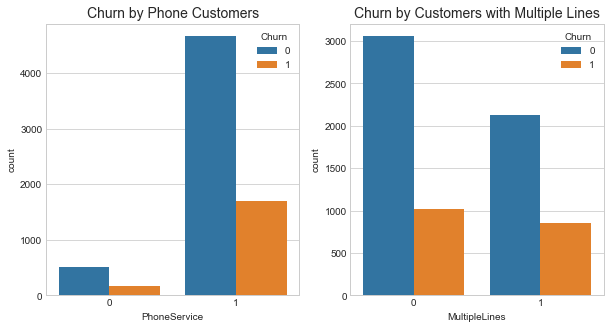

In [51]:
plt.figure(figsize=(10,5))
plt1 = plt.subplot(1,2,1)
sns.countplot(x='PhoneService',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Phone Customers", fontsize=14)

plt1 = plt.subplot(1,2,2)
sns.countplot(x='MultipleLines',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Customers with Multiple Lines", fontsize=14)

Phone service doesn't appear to have a strong correlation with churn rate

Text(0.5,1,'Churn by Streaming Movies Customers')

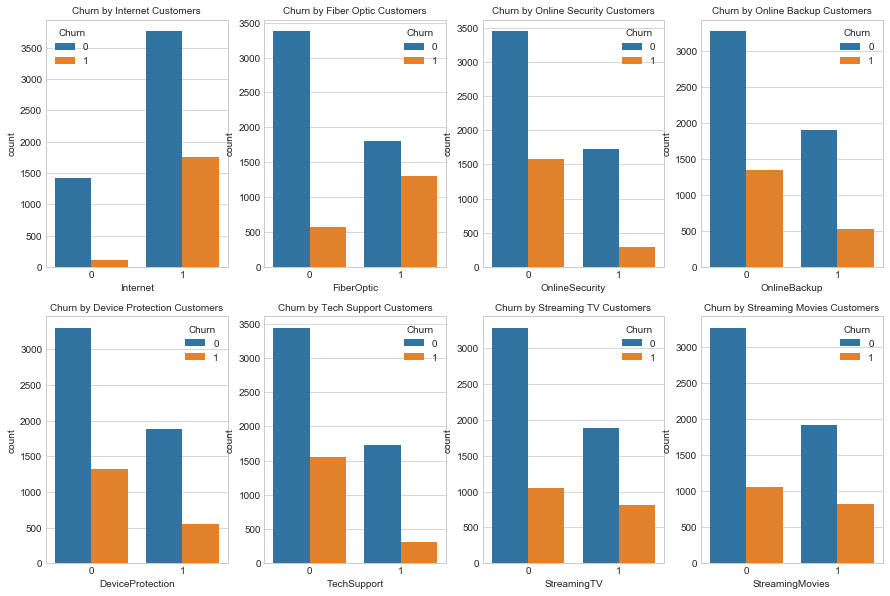

In [52]:
plt.figure(figsize=(15,10))

plt1 = plt.subplot(2,4,1)
sns.countplot(x='Internet',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Internet Customers", fontsize=10)

plt1 = plt.subplot(2,4,2)
sns.countplot(x='FiberOptic',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Fiber Optic Customers", fontsize=10)

plt1 = plt.subplot(2,4,3)
sns.countplot(x='OnlineSecurity',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Online Security Customers", fontsize=10)

plt1 = plt.subplot(2,4,4)
sns.countplot(x='OnlineBackup',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Online Backup Customers", fontsize=10)

plt1 = plt.subplot(2,4,5)
sns.countplot(x='DeviceProtection',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Device Protection Customers", fontsize=10)

plt1 = plt.subplot(2,4,6)
sns.countplot(x='TechSupport',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Tech Support Customers", fontsize=10)

plt1 = plt.subplot(2,4,7)
sns.countplot(x='StreamingTV',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Streaming TV Customers", fontsize=10)

plt1 = plt.subplot(2,4,8)
sns.countplot(x='StreamingMovies',hue='Churn',data=churnClean)
sns.set_style('whitegrid')
plt1.set_title("Churn by Streaming Movies Customers", fontsize=10)

Internet customers churn at high rates, but those with Online Security and Backup may churn at lower rates. Those who leverage Tech Support may also churn at lower rates while those with Streaming services may churn at higher rates.

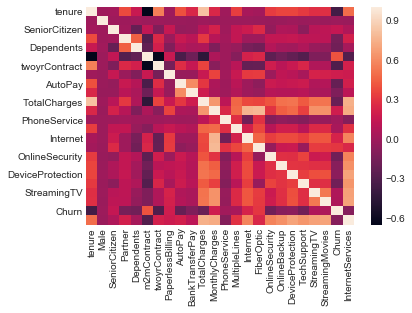

In [53]:
sns.heatmap(churnClean.corr())

In heatmap, churn appears to be most correlated with tenure, contract length, payment type, internet type, and online security purchase.

In [54]:
## look at the absolute value of the correlation between Churn and the potential modeling factors.
correlate = pd.to_numeric(churnClean.corr()['Churn'])
correlate = pd.DataFrame(abs(correlate))
correlate.sort_values(by='Churn', ascending=False)

,Churn
Churn,1.000000
m2mContract,0.405103
tenure,0.352229
FiberOptic,0.308020
twoyrContract,0.302253
Internet,0.227890
AutoPay,0.209902
TotalCharges,0.198324
MonthlyCharges,0.193356
PaperlessBilling,0.191825


## Modeing with Logistic Regression

#### Model 1: establishing a baseline

In [55]:
#creating training and test sets with 70-30 training test split
from sklearn.model_selection import train_test_split

X = churnClean.drop('Churn',axis=1)
y = churnClean['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [56]:
from sklearn.linear_model import LogisticRegression
#fit model 1
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
#get predictions
trainPred1 = model1.predict(X_train)
testPred1 = model1.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

print('Model 1 Accuracy- Train', round(accuracy_score(y_train,trainPred1)*100,2) , '%'
      , ' | Model 1 Accuracy- Test:', round(accuracy_score(y_test,testPred1)*100,2), '%')

Model 1 Accuracy- Train 80.3 %  | Model 1 Accuracy- Test: 80.6 %


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_train,trainPred1))
print(classification_report(y_test,testPred1))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      3628
          1       0.66      0.53      0.59      1302

avg / total       0.79      0.80      0.80      4930

             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1546
          1       0.68      0.52      0.59       567

avg / total       0.80      0.81      0.80      2113



#### Model 2: Removing features with lower correlation

In [60]:
#creating training and test sets with 70-30 training test split
from sklearn.model_selection import train_test_split

X = churnClean[['tenure', 'm2mContract', 'twoyrContract', 'AutoPay', 'PaperlessBilling', 'Internet', 'FiberOptic', 'OnlineSecurity', 'TechSupport', 'BankTransferPay', 'SeniorCitizen', 'Partner', 'Dependents']]
y = churnClean['Churn']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [62]:
#fit model 2
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
#get predictions
trainPred2 = model2.predict(X_train)
testPred2 = model2.predict(X_test)

In [64]:
print('Model 2 Accuracy- Train:', round(accuracy_score(y_train,trainPred2)*100,2) , '%'
      , ' | Model 2 Accuracy- Test:', round(accuracy_score(y_test,testPred2)*100,2), '%')

Model 2 Accuracy- Train: 80.06 %  | Model 2 Accuracy- Test: 79.98 %


In [65]:
print(classification_report(y_train,trainPred2))
print(classification_report(y_test,testPred2))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      3628
          1       0.65      0.52      0.58      1302

avg / total       0.79      0.80      0.79      4930

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1546
          1       0.67      0.51      0.58       567

avg / total       0.79      0.80      0.79      2113



#### Model 3: Narrowing to features based on observations

In [66]:
#creating training and test sets with 70-30 training test split
from sklearn.model_selection import train_test_split

X = churnClean[['tenure', 'm2mContract', 'AutoPay', 'Internet', 'FiberOptic', 'OnlineSecurity', 'TechSupport', 'SeniorCitizen', 'Partner', 'Dependents']]
y = churnClean['Churn']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [68]:
#fit model 3
model3 = LogisticRegression()
model3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
#get predictions
trainPred3 = model3.predict(X_train)
testPred3 = model3.predict(X_test)

In [70]:
print('Model 3 Accuracy- Train:', round(accuracy_score(y_train,trainPred3)*100,2) , '%'
      , ' | Model 3 Accuracy- Test:', round(accuracy_score(y_test,testPred3)*100,2), '%')

Model 3 Accuracy- Train: 79.39 %  | Model 3 Accuracy- Test: 79.7 %


In [71]:
print(classification_report(y_train,trainPred3))
print(classification_report(y_test,testPred3))

             precision    recall  f1-score   support

          0       0.83      0.90      0.87      3628
          1       0.64      0.50      0.56      1302

avg / total       0.78      0.79      0.78      4930

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1546
          1       0.67      0.48      0.56       567

avg / total       0.79      0.80      0.79      2113



#### Model 4: Feature Scaling- using features from broader list in Model 2

All variables in use are binary except for tenure-- taking natural log of tenure does not work because it returns inf. So, trying scaling.

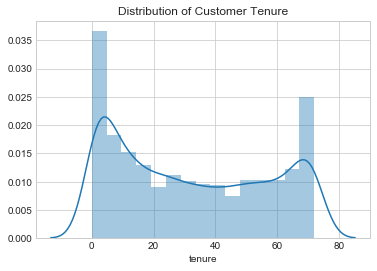

In [72]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1 = plt.subplot(111)
ax1.set_title('Distribution of Customer Tenure')
sns.distplot(churnClean['tenure'],bins=15)

In [73]:
X = churnClean[['tenure', 'm2mContract', 'twoyrContract', 'AutoPay', 'PaperlessBilling', 'Internet', 'FiberOptic', 'OnlineSecurity', 'TechSupport', 'BankTransferPay', 'SeniorCitizen', 'Partner', 'Dependents']]
y = churnClean['Churn']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [75]:
## with feature scaling
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
#fit model 4
model4 = LogisticRegression()
model4.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
#get predictions
trainPred4 = model4.predict(X_train)
testPred4 = model4.predict(X_test)

In [78]:
print('Model 4 Accuracy- Train:', round(accuracy_score(y_train,trainPred4)*100,2) , '%'
      , ' | Model 4 Accuracy- Test:', round(accuracy_score(y_test,testPred4)*100,2), '%')

Model 4 Accuracy- Train: 73.59 %  | Model 4 Accuracy- Test: 73.17 %


In [79]:
print(classification_report(y_train,trainPred4))
print(classification_report(y_test,testPred4))

             precision    recall  f1-score   support

          0       0.74      1.00      0.85      3628
          1       0.00      0.00      0.00      1302

avg / total       0.54      0.74      0.62      4930

             precision    recall  f1-score   support

          0       0.73      1.00      0.85      1546
          1       0.00      0.00      0.00       567

avg / total       0.54      0.73      0.62      2113



C:\Users\katri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This approach is not helping! Next, trying PCA to see if accuracy improves.

#### Model 5: PCA

In [80]:
from sklearn.decomposition import PCA

#Initialize PCA
pca = PCA(random_state=101)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [82]:
#create linear model leveraging PCA
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(random_state=101)
model5.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
#get predictions
trainPred5 = model5.predict(X_train)
testPred5 = model5.predict(X_test)

In [84]:
print('Model 5 Accuracy- Train:', round(accuracy_score(y_train,trainPred5)*100,2) , '%'
      , ' | Model 5 Accuracy- Test:', round(accuracy_score(y_test,testPred5)*100,2), '%')

Model 5 Accuracy- Train: 80.14 %  | Model 5 Accuracy- Test: 79.98 %


In [85]:
print(classification_report(y_train,trainPred5))
print(classification_report(y_test,testPred5))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      3628
          1       0.65      0.53      0.58      1302

avg / total       0.79      0.80      0.79      4930

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1546
          1       0.67      0.51      0.58       567

avg / total       0.79      0.80      0.79      2113



#### Model 6: Class imbalance

In [86]:
#creating training and test sets with 70-30 training test split
from sklearn.model_selection import train_test_split

X = churnClean[['tenure', 'm2mContract', 'twoyrContract', 'AutoPay', 'PaperlessBilling', 'Internet', 'FiberOptic', 'OnlineSecurity', 'TechSupport', 'BankTransferPay', 'SeniorCitizen', 'Partner', 'Dependents']]
y = churnClean['Churn']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [88]:
#fit model 6
model6 = LogisticRegression(random_state=101, class_weight='balanced')
model6.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=101,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [89]:
#get predictions
trainPred6 = model6.predict(X_train)
testPred6 = model6.predict(X_test)

In [90]:
print('Model 6 Accuracy- Train:', round(accuracy_score(y_train,trainPred6)*100,2) , '%'
      , ' | Model 6 Accuracy- Test:', round(accuracy_score(y_test,testPred6)*100,2), '%')

Model 6 Accuracy- Train: 74.04 %  | Model 6 Accuracy- Test: 74.78 %


In [91]:
print(classification_report(y_train,trainPred6))
print(classification_report(y_test,testPred6))

             precision    recall  f1-score   support

          0       0.91      0.72      0.80      3628
          1       0.51      0.79      0.62      1302

avg / total       0.80      0.74      0.75      4930

             precision    recall  f1-score   support

          0       0.90      0.74      0.81      1546
          1       0.52      0.78      0.62       567

avg / total       0.80      0.75      0.76      2113



Overall, Class Imbalance accuracy was poorer. Precision/recall were similar to previous models, but precision was higher with those who did not churn and lower for those who did churn.

#### Model 7: Larger test size

In [92]:
#creating training and test sets with 80-20 training test split
X = churnClean[['tenure', 'm2mContract', 'twoyrContract', 'AutoPay', 'PaperlessBilling', 'Internet', 'FiberOptic', 'OnlineSecurity', 'TechSupport', 'BankTransferPay', 'SeniorCitizen', 'Partner', 'Dependents']]
y = churnClean['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=101)

In [93]:
#fit model 7
model7 = LogisticRegression(random_state=101)
model7.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
#get predictions
trainPred7 = model7.predict(X_train)
testPred7 = model7.predict(X_test)

In [95]:
print('Model 7 Accuracy- Train:', round(accuracy_score(y_train,trainPred7)*100,2) , '%'
      , ' | Model 7 Accuracy- Test:', round(accuracy_score(y_test,testPred7)*100,2), '%')

Model 7 Accuracy- Train: 80.26 %  | Model 7 Accuracy- Test: 79.35 %


In [96]:
print(classification_report(y_train,trainPred7))
print(classification_report(y_test,testPred7))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      4148
          1       0.65      0.54      0.59      1486

avg / total       0.79      0.80      0.80      5634

             precision    recall  f1-score   support

          0       0.82      0.91      0.87      1026
          1       0.67      0.48      0.56       383

avg / total       0.78      0.79      0.78      1409



This performs no better than any of the previous models. Perhaps collecting more data would be helpful.

## Conclusion

Model 1 (Baseline of Cleaned Churn Data) performed the best of all of the methods attempted.

Once the features are cleaned in this data set, the data are pretty acccurate with precision, recall, and F1 scores at around 80%. Feature scaling, feature selection, and PCA have not been as impactful with this data set compared to the linear data set. Most of the feature are zeros and ones which is a right fit for the data, but not for these methods of fine-tuning. Class imbalance could be used if the goal is to be more precise with those who do not churn. For example, if the data is to be used for something expensive, like a great promo for customers who may leave, and so the FP rate needs to be as low as possible, that could be use as it improved precision and recall on 0s by ~.06-.07.